In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'

freq = 20
simulation = 2

simtype = ['initial', 'plasticity','adapted']
namenoise = str(freq)+'Hz_'+simtype[simulation]
print(namenoise)
## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2    # offset in nA
                                               ,0.2,0.2 # amplitude in nA
                                               ,freq,freq   # frequency in Hz
                                              ],5000,15000,20000,
                                       namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


20Hz_adapted
Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(20.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
if namenoise.find('initial') != -1:
    print('intial run - no Plasticity')
    from E_Synapses_NoPlasticity import *
elif namenoise.find('adapt') != -1:
    print('adapted network - no Plasticity')
    from E_Synapses_NoPlasticity import *
elif namenoise.find('plasticity') != -1:
    print('adaptation - Plasticity')
    from E_New_Plasticity import *
else:
    print('relook at name of namenoise')

adapted network - no Plasticity
loading went fine
nr of noise is 2
weights - no STDP - coupled <PC_Noise_Synapse_Coupled_noSTDP.noise_weight: array([0.46700952, 0.45471049, 0.4606666 , 0.46165528, 0.45742039,
       0.45320397, 0.46097816, 0.46387584, 0.47252192, 0.46494722,
       0.46700952, 0.45471049, 0.4606666 , 0.46165528, 0.45742039,
       0.45320397, 0.46097816, 0.46387584, 0.47252192, 0.46494722])>


WARNING    The expression "abs(i - j) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


weight - noSTDP - uncoupled <PC_Noise_Synapse_Uncoupled_noSTDP.noise_weight: array([0.48475918, 0.5114593 , 0.45042732, 0.51824417, 0.49843413,
       0.48680703, 0.52047759, 0.45978458, 0.47876724, 0.46136905,
       0.48475918, 0.5114593 , 0.45042732, 0.51824417, 0.49843413,
       0.48680703, 0.52047759, 0.45978458, 0.47876724, 0.46136905])>


In [5]:
# run pt1
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 20. s
0.505175 s (2%) simulated in 10s, estimated 6m 26s remaining.
1.016275 s (5%) simulated in 20s, estimated 6m 14s remaining.
1.5155 s (7%) simulated in 30s, estimated 6m 6s remaining.
2.0079 s (10%) simulated in 40s, estimated 5m 59s remaining.
2.483475 s (12%) simulated in 50s, estimated 5m 53s remaining.
2.987925 s (14%) simulated in 1m 0s, estimated 5m 42s remaining.
3.42775 s (17%) simulated in 1m 10s, estimated 5m 39s remaining.
3.848825 s (19%) simulated in 1m 20s, estimated 5m 36s remaining.
4.3363 s (21%) simulated in 1m 30s, estimated 5m 25s remaining.
4.7528 s (23%) simulated in 1m 40s, estimated 5m 21s remaining.
5.247775 s (26%) simulated in 1m 50s, estimated 5m 9s remaining.
5.747325 s (28%) simulated in 2m 0s, estimated 4m 58s remaining.
6.2729 s (31%) simulated in 2m 10s, estimated 4m 45s remaining.
6.80465 s (34%) simulated in 2m 20s, estimated 4m 32s remaining.
7.3334 s (36%) simulated in 2m 30s, estimated 4m 19s rem

In [6]:
if namenoise.find('initial') != -1:
    from F_save_data_NoPlasticity import *
elif namenoise.find('adapt') != -1:
    from F_save_data_NoPlasticity import *
elif namenoise.find('plasticity') != -1:
    from F_save_data_Plasticity import *
else:
    print('something is wrong but it should have appeared earlier, weird af')

Inputs are saved
Voltage Cells are saved
Spike Times are saved


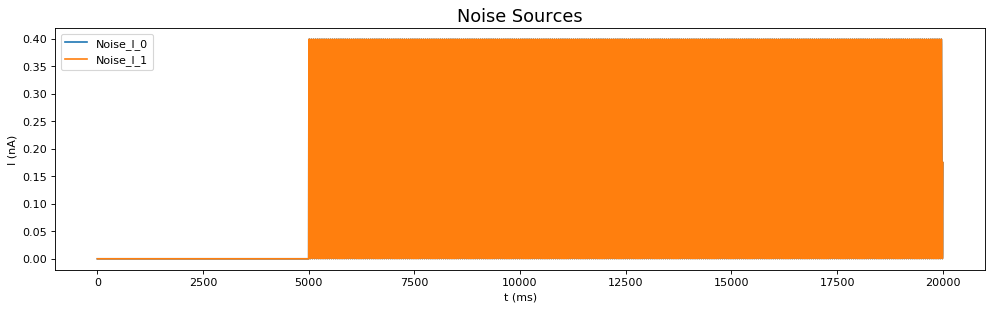

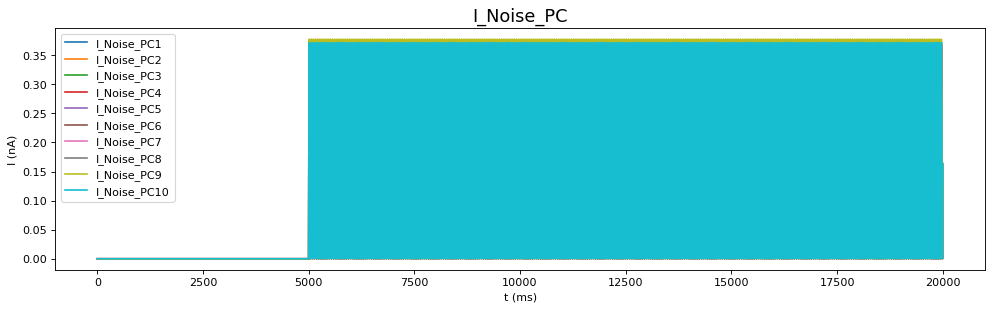

Coupled Scenario


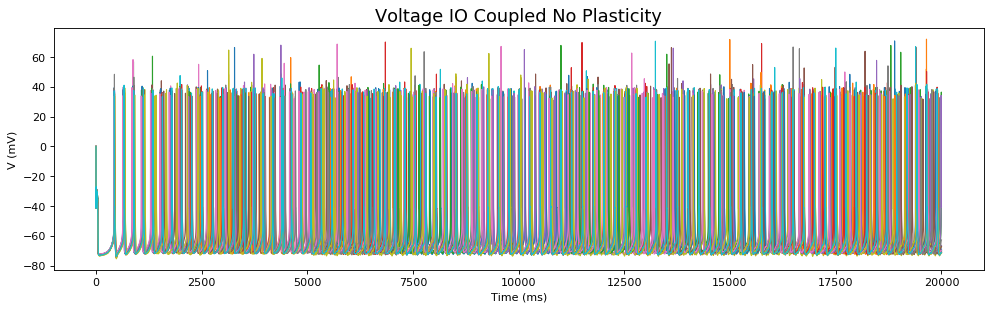

Number of spikes DCN: 770
Number of spikes DCN: 895
Number of spikes DCN: 796
Number of spikes DCN: 831
Number of spikes DCN: 805
Number of spikes DCN: 837
Number of spikes DCN: 836
Number of spikes DCN: 817
Number of spikes DCN: 801
Number of spikes DCN: 877


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


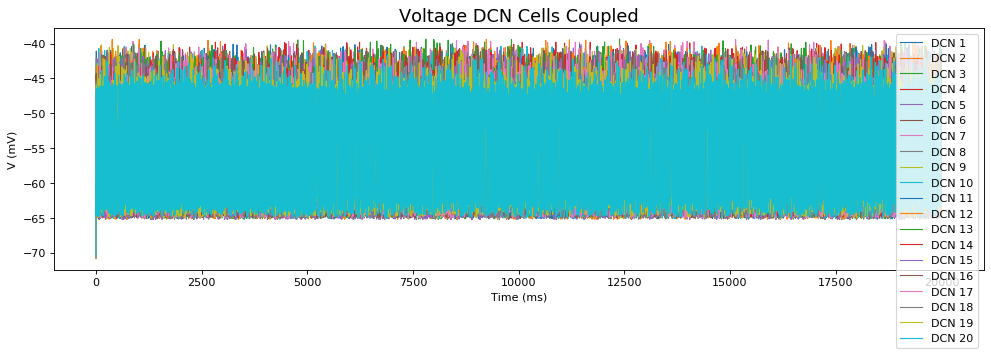

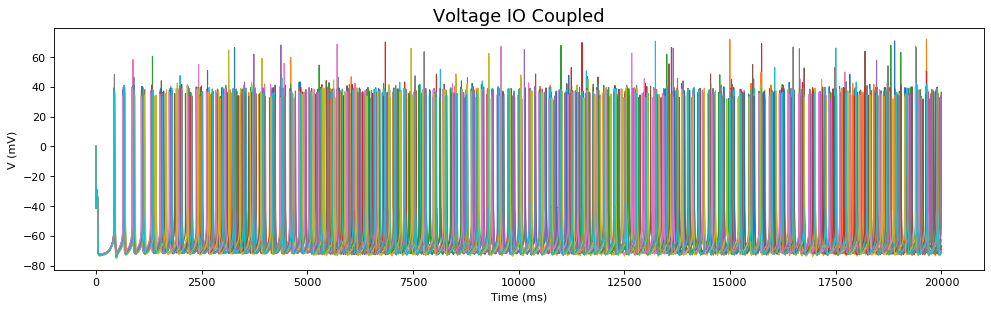

Uncoupled Scenario


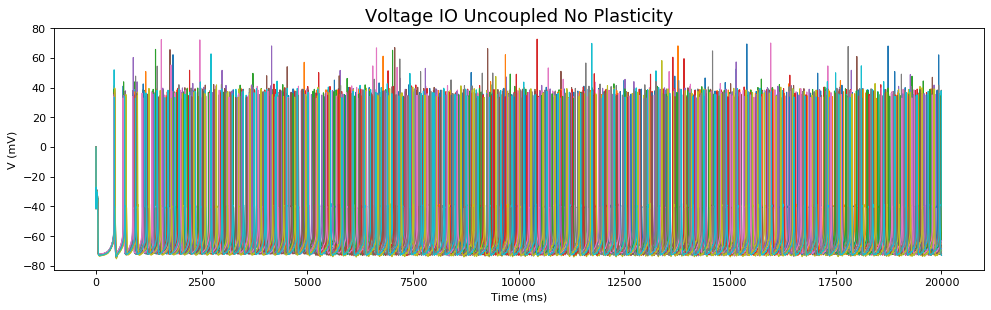

Number of spikes DCN: 781
Number of spikes DCN: 925
Number of spikes DCN: 808
Number of spikes DCN: 837
Number of spikes DCN: 805
Number of spikes DCN: 859
Number of spikes DCN: 844
Number of spikes DCN: 834
Number of spikes DCN: 814
Number of spikes DCN: 886


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


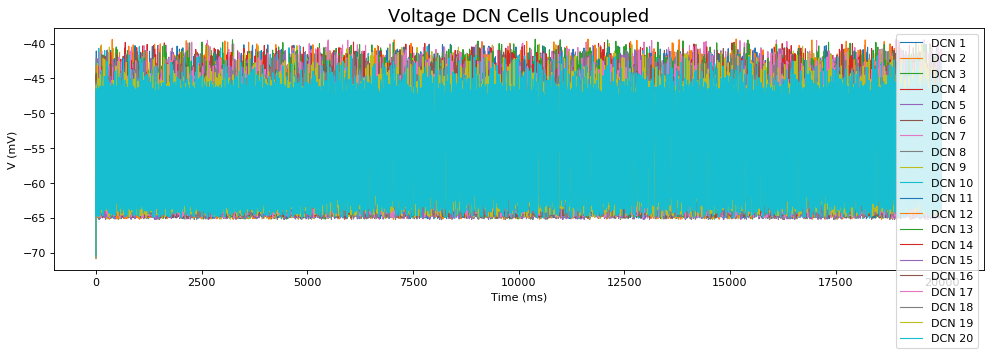

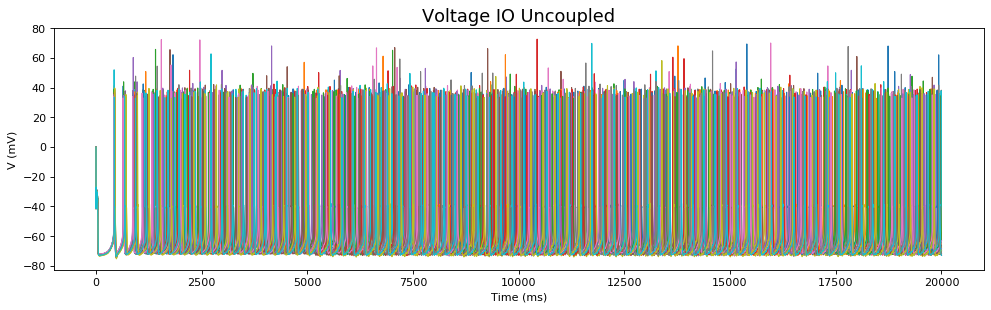

In [7]:
#visualization check
if namenoise.find('initial') != -1:
    from G_Plot_NoPlasticity import *
elif namenoise.find('adapt') != -1:
    from G_Plot_NoPlasticity import *
elif namenoise.find('plasticity') != -1:
    from G_Plot_Plasticity import *
else:
    print('something is wrong but it should have appeared earlier, weird af')


In [ ]:
from F_save_data_Plasticity import *

In [ ]:
%matplotlib notebook
#print(y)
y_post = np.append(np.zeros(1000),np.ones(19000))
print(y_post)
print(mon_N_PC_Uncoupled.w_IO_uncoupled)
x=np.linspace(0,len(y_post),len(y_post))
print(x)
plt.subplots(3,1)
#plt.title('distribution uncoupled')

for k in range(1,2):
    x=mon_N_PC_Coupled.freq_dep_PC[k]
    x2 = mon_N_PC_Coupled.freq_dep_IO[k]
    ax= plt.subplot(211)
    plt.plot(x)
    plt.plot(x2)
    plt.subplot(212,sharex=ax)
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.f_st_PC_coupled[k],color='black')
    #plt.ylim([100,120])
    #plt.xlim([5000,10000])
    
    
print(sum(mon_N_PC_Coupled.freq_dep_PC[0][5000:10000]))
print(sum(mon_N_PC_Coupled.freq_dep_IO[0][5000:10000]))
#plt.xlim([0,30000])    
#plt.legend(['w io coupled', 'w pc coupled'])
plt.show()
print('mean x',np.nanmean(x))
print('std x',np.nanstd(x))
plt.figure()
#plt.title('distribution uncoupled')
for k in range(1,20):

    plt.plot(mon_N_PC_Coupled.tau[k],color='green')
    plt.plot(mon_N_PC_Uncoupled.tau[k],color='red')
    
    #plt.plot(mon_N_PC_Uncoupled.w_PC_uncoupled[k],color='blue')
plt.legend(['w pc unc', 'w io unc'])
plt.show()

#plt.title('distribution uncoupled')
plt.figure()
for k in range(0,20):
    #plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    #plt.plot(mon_N_PC_Uncoupled.f_st_PC_uncoupled[k],color='black')
    #plt.plot(mon_N_PC_Coupled.freq_dep[k],color='red')
    #plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
    #plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')

    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='green')

#plt.legend(['long term', 'short term'])
plt.figure()
plt.plot(mon_N_PC_Coupled.weight_IO[k],color='black')
plt.plot(mon_N_PC_Coupled.weight_PC[k],color='red')
plt.show()



In [ ]:
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.f_lt_PC_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.f_lt_PC_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.mean_freq_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.mean_freq_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
#plt.title('distribution uncoupled')
for k in range(0,10):
    plt.plot(mon_N_PC_Uncoupled.max_LTD_IO_uncoupled[k],color='red')
    plt.plot(mon_N_PC_Coupled.max_LTD_IO_coupled[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('PC moving average')
for k in range(0,1):
    plt.plot(mon_N_PC_Coupled.y[k],color='red')
    #plt.plot(mon_N_PC_Coupled.f_st_PC[k],color='black')
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')
plt.show()
plt.figure()
plt.title('IO moving average')
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
plt.xlabel('time [ms]')
plt.ylabel('frequency [Hz]')

plt.figure()
plt.title('Difference in moving average IO (short term - long term)')
#for p in range(0,n_IO):
#    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]
#    idxio = (difio>0).astype(float)
#    procentage_LTD = sum(idxio)/1000
#    print('depression %',procentage_LTD)
#    plt.plot(mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p])
#plt.figure()
for p in range(0,10):
    difio=mon_N_PC_Coupled.f_st_IO[p]-mon_N_PC_Coupled.f_lt_IO[p]

    dif=mon_N_PC_Coupled.f_st_PC[p]-mon_N_PC_Coupled.f_lt_PC[p]
    idx = (dif>0).astype(float)
    #plt.plot(idx)
    #plt.ylim([0,1.1])
    procentage_LTP = sum(idx)/1000
    plt.plot(dif)
    plt.plot(difio)
    print('potentiated %',procentage_LTP)
print(mon_N_PC_Coupled.f_lt_IO.shape)

In [ ]:
print(np.floor(-0.1))

In [ ]:
neuron = 0
ex = 2000
wpc = mon_N_PC_Coupled.weight_PC[neuron]
wio = mon_N_PC_Coupled.weight_IO[neuron]
maxDelay = 100
gr = (1-1/(1+exp(-ex*(wpc+np.abs(wio)-0.3*0.5))))
prop= (np.abs(wio)/(np.abs(wio)+wpc))
prop2=(np.abs(wpc)/(np.abs(wio)+wpc))
tauIO = maxDelay*(np.abs(wio)/(np.abs(wio)+wpc))*gr
tauPC = maxDelay*(np.abs(wpc)/(np.abs(wio)+wpc))*gr

fig, axs = plt.subplots(4,1, figsize=(10,20))

ax1 = plt.subplot(4,1,1)
plt.plot(tauPC)
plt.plot(tauIO)

ax2 = plt.subplot(4,1,2)
plt.plot(wpc)
plt.plot(wio)

ax3 = plt.subplot(4,1,3)
plt.plot(prop2)
plt.plot(prop)
plt.show()

In [ ]:
x= np.linspace(0,20,10000)
sin1 = np.sin(x)
sin2 = np.sin(x*3)
neu = [2.5,5,14,18]
yPC = np.ones(len(neu))

f, a =plt.subplots(2,1, figsize=(20,15))
ax=plt.subplot(211)
plt.plot(x,sin1,linewidth=4)
for k in neu:
    plt.axvline(x=k,color='r',linestyle='--')
plt.ylabel('Input current [nA]')
plt.subplot(212,sharex=ax)
plt.scatter(x=neu,y=yPC,marker='|', color='black',s=1000)
plt.xlabel('time [s]')
#plt.xlim([0,20])
plt.show()
plt.figure()
plt.plot(x,sin2,linewidth=3)
plt.show()